# Question 1
**Steps:**   
Import the necessary libraries  
Import the dataset from this address.  
Assign it to a variable called users  
Discover what is the mean age per occupation  
Discover the Male ratio per occupation and sort it from the most to the least  
For each occupation, calculate the minimum and maximum ages  
For each combination of occupation and sex, calculate the mean age  
For each occupation present the percentage of women and men  

In [2]:
# Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset from this address
url_path = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign it to a variable called users
users = pd.read_csv(url_path, sep='|', index_col = 'user_id')
# Step 4: Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()
mean_age_per_occupation.columns = ['Occupation', 'Mean Age']
print("\nMean Age per Occupation:\n", tabulate(mean_age_per_occupation, headers='keys', tablefmt='pretty', showindex=False))


Mean Age per Occupation:
 +---------------+--------------------+
|  Occupation   |      Mean Age      |
+---------------+--------------------+
| administrator | 38.74683544303797  |
|    artist     | 31.392857142857142 |
|    doctor     | 43.57142857142857  |
|   educator    | 42.01052631578948  |
|   engineer    | 36.38805970149254  |
| entertainment | 29.22222222222222  |
|   executive   |      38.71875      |
|  healthcare   |      41.5625       |
|   homemaker   | 32.57142857142857  |
|    lawyer     |       36.75        |
|   librarian   |        40.0        |
|   marketing   | 37.61538461538461  |
|     none      | 26.555555555555557 |
|     other     | 34.523809523809526 |
|  programmer   | 33.121212121212125 |
|    retired    | 63.07142857142857  |
|   salesman    | 35.666666666666664 |
|   scientist   | 35.54838709677419  |
|    student    | 22.081632653061224 |
|  technician   | 33.148148148148145 |
|    writer     | 36.31111111111111  |
+---------------+--------------------

In [3]:
# Step 5: Discover the Male ratio per occupation and sort it from the most to the least

male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(by='male_ratio', ascending=False)['male_ratio'].reset_index()
male_ratio_per_occupation_sorted.columns = ['Occupation', 'Male Ratio']
print("\nMale Ratio per Occupation (sorted) from the most to the least:\n", tabulate(male_ratio_per_occupation_sorted, headers='keys', tablefmt='pretty', showindex=False))


Male Ratio per Occupation (sorted) from the most to the least:
 +---------------+---------------------+
|  Occupation   |     Male Ratio      |
+---------------+---------------------+
|    doctor     |         1.0         |
|   engineer    | 0.9701492537313433  |
|  technician   | 0.9629629629629629  |
|    retired    | 0.9285714285714286  |
|  programmer   | 0.9090909090909091  |
|   executive   |       0.90625       |
|   scientist   | 0.9032258064516129  |
| entertainment | 0.8888888888888888  |
|    lawyer     | 0.8333333333333334  |
|   salesman    |        0.75         |
|   educator    | 0.7263157894736842  |
|    student    | 0.6938775510204082  |
|     other     | 0.6571428571428571  |
|   marketing   | 0.6153846153846154  |
|    writer     | 0.5777777777777777  |
|     none      | 0.5555555555555556  |
| administrator | 0.5443037974683544  |
|    artist     | 0.5357142857142857  |
|   librarian   | 0.43137254901960786 |
|  healthcare   |       0.3125        |
|   homemaker  

In [4]:
# Step 6: For each occupation, calculate the minimum and maximum ages

min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()
print("\nMinimum and Maximum Ages per Occupation:\n", tabulate(min_max_ages_per_occupation, headers='keys', tablefmt='pretty', showindex=False))


Minimum and Maximum Ages per Occupation:
 +---------------+-----+-----+
|  occupation   | min | max |
+---------------+-----+-----+
| administrator | 21  | 70  |
|    artist     | 19  | 48  |
|    doctor     | 28  | 64  |
|   educator    | 23  | 63  |
|   engineer    | 22  | 70  |
| entertainment | 15  | 50  |
|   executive   | 22  | 69  |
|  healthcare   | 22  | 62  |
|   homemaker   | 20  | 50  |
|    lawyer     | 21  | 53  |
|   librarian   | 23  | 69  |
|   marketing   | 24  | 55  |
|     none      | 11  | 55  |
|     other     | 13  | 64  |
|  programmer   | 20  | 63  |
|    retired    | 51  | 73  |
|   salesman    | 18  | 66  |
|   scientist   | 23  | 55  |
|    student    |  7  | 42  |
|  technician   | 21  | 55  |
|    writer     | 18  | 60  |
+---------------+-----+-----+


In [5]:
# Step 7: For each combination of occupation and sex, calculate the mean age

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()

# Separate DataFrame for Females (F)
mean_age_female = mean_age_per_occupation_sex[mean_age_per_occupation_sex['gender'] == 'F']
mean_age_female.columns = ['Occupation', 'Gender', 'Mean Age']
print("\nMean Age per Occupation for Females:\n", tabulate(mean_age_female, headers='keys', tablefmt='pretty', showindex=False))

# Separate DataFrame for Males (M)
mean_age_male = mean_age_per_occupation_sex[mean_age_per_occupation_sex['gender'] == 'M']
mean_age_male.columns = ['Occupation', 'Gender', 'Mean Age']
print("\nMean Age per Occupation for Males:\n", tabulate(mean_age_male, headers='keys', tablefmt='pretty', showindex=False))


Mean Age per Occupation for Females:
 +---------------+--------+--------------------+
|  Occupation   | Gender |      Mean Age      |
+---------------+--------+--------------------+
| administrator |   F    | 40.638888888888886 |
|    artist     |   F    | 30.307692307692307 |
|   educator    |   F    | 39.11538461538461  |
|   engineer    |   F    |        29.5        |
| entertainment |   F    |        31.0        |
|   executive   |   F    |        44.0        |
|  healthcare   |   F    | 39.81818181818182  |
|   homemaker   |   F    | 34.166666666666664 |
|    lawyer     |   F    |        39.5        |
|   librarian   |   F    |        40.0        |
|   marketing   |   F    |        37.2        |
|     none      |   F    |        36.5        |
|     other     |   F    | 35.47222222222222  |
|  programmer   |   F    | 32.166666666666664 |
|    retired    |   F    |        70.0        |
|   salesman    |   F    |        27.0        |
|   scientist   |   F    | 28.333333333333332 |
|

# Step 8: For each occupation present the percentage of women and men

gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation = gender_percentage_per_occupation.reset_index()
print("\nGender Percentage per Occupation:\n", tabulate(gender_percentage_per_occupation, headers='keys', tablefmt='pretty', showindex=False))

# Question 2

**Steps**

Import the necessary libraries    
Import the dataset from this address  
Assign it to a variable called euro12  
Select only the Goal column  
How many team participated in the Euro2012?  
What is the number of columns in the dataset?  
View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline  
Sort the teams by Red Cards, then to Yellow Cards  
Calculate the mean Yellow Cards given per Team  
Filter teams that scored more than 6 goalsStep  
Select the teams that start with G  
Select the first 7 columns  
Select all columns except the last 3  
Present only the Shooting Accuracy from England, Italy and Russia  

In [7]:
# Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset from the given address
url_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(url_path)
# Step 4: Select only the Goal column

goals = euro12['Goals']
print("\nGoals Column Selected\n")
print(tabulate(goals.to_frame(), headers='keys', tablefmt='pretty', showindex=False))



Goals Column Selected

+-------+
| Goals |
+-------+
|   4   |
|   4   |
|   4   |
|   5   |
|   3   |
|  10   |
|   5   |
|   6   |
|   2   |
|   2   |
|   6   |
|   1   |
|   5   |
|  12   |
|   5   |
|   2   |
+-------+


In [8]:
# Step 5: How many teams participated in Euro 2012?

teams_in_2012 = euro12['Team'].nunique()
print("\nNumber of Teams Participated in Euro 2012:", teams_in_2012)



Number of Teams Participated in Euro 2012: 16


In [9]:
# Step 6: What is the number of columns in the dataset?

total_columns = len(euro12.columns)
print("\nNumber of Columns in the Dataset:", total_columns)


Number of Columns in the Dataset: 35


In [11]:
# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline Dataframe Created\n")
print(tabulate(discipline, headers='keys', tablefmt='pretty', showindex=False))



Discipline Dataframe Created

+---------------------+--------------+-----------+
|        Team         | Yellow Cards | Red Cards |
+---------------------+--------------+-----------+
|       Croatia       |      9       |     0     |
|   Czech Republic    |      7       |     0     |
|       Denmark       |      4       |     0     |
|       England       |      5       |     0     |
|       France        |      6       |     0     |
|       Germany       |      4       |     0     |
|       Greece        |      9       |     1     |
|        Italy        |      16      |     0     |
|     Netherlands     |      5       |     0     |
|       Poland        |      7       |     1     |
|      Portugal       |      12      |     0     |
| Republic of Ireland |      6       |     1     |
|       Russia        |      6       |     0     |
|        Spain        |      11      |     0     |
|       Sweden        |      7       |     0     |
|       Ukraine       |      5       |     0     |


In [12]:
# Step 8: Sort the teams by Red Cards, then Yellow Cards

sorted_data = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print("\nSorted Data\n")
print(tabulate(sorted_data, headers='keys', tablefmt='pretty', showindex=False))


Sorted Data

+---------------------+--------------+-----------+
|        Team         | Yellow Cards | Red Cards |
+---------------------+--------------+-----------+
|       Greece        |      9       |     1     |
|       Poland        |      7       |     1     |
| Republic of Ireland |      6       |     1     |
|        Italy        |      16      |     0     |
|      Portugal       |      12      |     0     |
|        Spain        |      11      |     0     |
|       Croatia       |      9       |     0     |
|   Czech Republic    |      7       |     0     |
|       Sweden        |      7       |     0     |
|       France        |      6       |     0     |
|       Russia        |      6       |     0     |
|       England       |      5       |     0     |
|     Netherlands     |      5       |     0     |
|       Ukraine       |      5       |     0     |
|       Denmark       |      4       |     0     |
|       Germany       |      4       |     0     |
+----------------

In [13]:

# Step 9: Calculate the mean Yellow Cards given per Team

mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards per Team:", mean_yellow_cards_per_team)


Mean Yellow Cards per Team: 7.4375


In [14]:
# Step 10: Filter teams that scored more than 6 goals

filter_teams_data = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print("\neams with More Than 6 Goals\n")
print(tabulate(filter_teams_data, headers='keys', tablefmt='pretty', showindex=False))


eams with More Than 6 Goals

+---------+-------+
|  Team   | Goals |
+---------+-------+
| Germany |  10   |
|  Spain  |  12   |
+---------+-------+


In [15]:
# Step 11: Select the teams that start with G

teams_starts_with_G = euro12[euro12['Team'].str.startswith('G')][['Team', 'Goals']]
print("\nTeams Starting with 'G'\n")
print(tabulate(teams_starts_with_G, headers='keys', tablefmt='pretty', showindex=False))


Teams Starting with 'G'

+---------+-------+
|  Team   | Goals |
+---------+-------+
| Germany |  10   |
| Greece  |   5   |
+---------+-------+


In [16]:
# Step 12: Select the first 7 columns

first_seven_columns = euro12.iloc[:, :7]
print("\nFirst Seven Columns\n")
print(tabulate(first_seven_columns, headers='keys', tablefmt='pretty', showindex=False))


First Seven Columns

+---------------------+-------+-----------------+------------------+-------------------+------------------+----------------------------+
|        Team         | Goals | Shots on target | Shots off target | Shooting Accuracy | % Goals-to-shots | Total shots (inc. Blocked) |
+---------------------+-------+-----------------+------------------+-------------------+------------------+----------------------------+
|       Croatia       |   4   |       13        |        12        |       51.9%       |      16.0%       |             32             |
|   Czech Republic    |   4   |       13        |        18        |       41.9%       |      12.9%       |             39             |
|       Denmark       |   4   |       10        |        10        |       50.0%       |      20.0%       |             27             |
|       England       |   5   |       11        |        18        |       50.0%       |      17.2%       |             40             |
|       France     

In [17]:
# Step 13: Select all columns except the last 3

all_columns_except_last_three = euro12.iloc[:, :-3]
print("\nStep 13: All Columns Except the Last 3\n")
print(all_columns_except_last_three)


Step 13: All Columns Except the Last 3

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9               

In [18]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia

shooting_data = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nStep 14: Shooting Accuracy from England, Italy, and Russia\n")
print(tabulate(shooting_data, headers='keys', tablefmt='pretty', showindex=False))



Step 14: Shooting Accuracy from England, Italy, and Russia

+---------+-------------------+
|  Team   | Shooting Accuracy |
+---------+-------------------+
| England |       50.0%       |
|  Italy  |       43.0%       |
| Russia  |       22.5%       |
+---------+-------------------+


# Question 3
Housing  
**Steps**  
Import the necessary libraries  
Create 3 differents Series, each of length 100, as follows: a. The first a random number from 1 to 4 b. The second a random     number from 1 to 3 c.The third a random number from 10,000 to 30,000  
Create a DataFrame by joinning the Series by column  
Change the name of the columns to bedrs, bathrs, price_sqr_meter  
Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'   
Ops it seems it is going only until index 99. Is it true?  
Reindex the DataFrame so it goes from 0 to 299   

In [19]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Step 2: Create three different Series
np.random.seed(42)  # Setting seed for reproducibility
series_1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series_2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series_3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

#Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series_1, series_2, series_3], axis=1)

#Step 4:  Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

#Step 5: Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3]))

#Step 6:  Check if it goes only until index 99
print("Index goes only until 99:", bigcolumn.index.max() == 99)

#Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Display the result in tabular format
print("\nReindexed bigcolumn so it goes from 0 to 299 :\n")
print(tabulate(bigcolumn, headers='keys', tablefmt='pretty'))

Index goes only until 99: True

Reindexed bigcolumn so it goes from 0 to 299 :

+-----+-------+
|     |   0   |
+-----+-------+
|  0  |   3   |
|  1  |   4   |
|  2  |   1   |
|  3  |   3   |
|  4  |   3   |
|  5  |   4   |
|  6  |   1   |
|  7  |   1   |
|  8  |   3   |
|  9  |   2   |
| 10  |   3   |
| 11  |   3   |
| 12  |   3   |
| 13  |   3   |
| 14  |   4   |
| 15  |   1   |
| 16  |   4   |
| 17  |   4   |
| 18  |   4   |
| 19  |   3   |
| 20  |   2   |
| 21  |   1   |
| 22  |   2   |
| 23  |   4   |
| 24  |   4   |
| 25  |   2   |
| 26  |   2   |
| 27  |   2   |
| 28  |   4   |
| 29  |   4   |
| 30  |   1   |
| 31  |   1   |
| 32  |   4   |
| 33  |   2   |
| 34  |   2   |
| 35  |   1   |
| 36  |   4   |
| 37  |   1   |
| 38  |   1   |
| 39  |   3   |
| 40  |   3   |
| 41  |   3   |
| 42  |   2   |
| 43  |   4   |
| 44  |   4   |
| 45  |   4   |
| 46  |   4   |
| 47  |   3   |
| 48  |   2   |
| 49  |   2   |
| 50  |   3   |
| 51  |   2   |
| 52  |   3   |
| 53  |   4   |
| 54  | 

# Question 4
**Wind Statistics**

The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

**Steps:**
1. Import the necessary libraries.
2. Import the dataset from the attached file wind.txt.
3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
5. Set the right dates as the index. Pay attention to the data type, it should be datetime64[ns].
6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.
7. Compute how many non-missing values there are in total.
8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
9. Create a DataFrame called loc_stats and calculate the min, max, and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
10. Create a DataFrame called day_stats and calculate the min, max, mean windspeed, and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
12. Downsample the record to a yearly frequency for each location.
13. Downsample the record to a monthly frequency for each location.
14. Downsample the record to a weekly frequency for each location.
15. Calculate the min, max, and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2, 1961) for the first 52 weeks.


In [25]:
# Step 1 import libraries 
import pandas as pd
import numpy as np
from datetime import datetime



# Step 2 give path
dataset_path = "C:\\Users\\manyu\\OneDrive\\GEORGIAN\\Data_Programming\\wind.txt"

data = pd.read_table(dataset_path, sep="\s+")

# Step 3
data.index = pd.to_datetime(data.index)

# Step 4
def fix_year(x):
    return x.replace(year=1961)
data.index = data.index.map(fix_year)

# Step 5  
data.index.name = None

# Step 6
nulls_per_location = data.isna().sum()
print("Step 6 - Number of Missing Values per Location:")
print(nulls_per_location)
# Step 7 
total_values = data.count().sum()
print("\nStep 7 -Total Number of Non-Missing Values:", total_values)

# Step 8
mean_all = data.mean().mean()
print("\nStep 8 - Mean Windspeed Across All Locations and Times:", mean_all)

# Step 9: Calculate min, max, mean, and std for each location
loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]

# Print Step 9
print("\nStep 9: Location statistics\n", tabulate(loc_stats, headers='keys', tablefmt='pretty'))

# Step 10
day_stats = data.T.describe()
print("\n\n\nStep 10 - Day Statistics:")
print(day_stats)

# Step 11: Find the average windspeed in January for each location
january_avg = data[data.index.month == 1].mean()

# Print Step 11
print("\nStep 11: Average windspeed in January for each location\n", tabulate(january_avg.reset_index(), headers='keys', tablefmt='pretty', showindex=False))
# Steps 12-14: Downsample the record to yearly, monthly, and weekly frequency
data_yearly = data.resample('Y').mean()
data_monthly = data.resample('M').mean()
data_weekly = data.resample('W-Mon').mean()

# Print Steps 12-14
print("\nStep 12: Downsampled to yearly frequency\n",data_yearly)
print("\nStep 13: Downsampled to monthly frequency\n", data_monthly)
print("\nStep 14: Downsampled to weekly frequency\n", data_weekly)

# Step 15: Calculate min, max, mean, and std for each week for the first 52 weeks
weekly_stats = data_weekly.head(52).describe().transpose()[['min', 'max', 'mean', 'std']]

# Print Step 15
print("\nStep 15: Weekly statistics for the first 52 weeks\n", tabulate(weekly_stats, headers='keys', tablefmt='pretty'))

Step 6 - Number of Missing Values per Location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7 -Total Number of Non-Missing Values: 98579

Step 8 - Mean Windspeed Across All Locations and Times: 14.299199599246569

Step 9: Location statistics
 +-----+------+-------+--------------------+--------------------+
|     | min  |  max  |        mean        |        std         |
+-----+------+-------+--------------------+--------------------+
| Yr  | 61.0 | 78.0  | 69.50030422878004  | 5.1881311286897445 |
| Mo  | 1.0  | 12.0  | 6.523273501673258  | 3.4488710574193893 |
| Dy  | 1.0  | 31.0  | 15.728627928202007 | 8.800334974744912  |
| RPT | 0.67 | 35.8  | 12.362987210718636 | 5.618412959473287  |
| VAL | 0.21 | 33.37 | 10.644314411809468 | 5.267356471594362  |
| ROS | 1.5  | 33.84 | 11.660526475958614 | 5.008449958866736  |
| KIL | 0.0  | 28.46 | 6.306468260009134  | 3.605811207145495 

# Question 5
**Steps**
Import the necessary libraries   
Import the dataset from this address.    
Assign it to a variable called chipo.   
See the first 10 entries    
What is the number of observations in the dataset?    
What is the number of columns in the dataset?   
Print the name of all the columns.   
How is the dataset indexed?       
Which was the most-ordered item?     
For the most-ordered item, how many items were ordered?          
What was the most ordered item in the choice_description column?     
How many items were orderd in total?      
Turn the item price into a float. Check the item price type. Create a lambda function and change the type of item price.     Check the item price type      
How much was the revenue for the period in the dataset?    
How many orders were made in the period?    
What is the average revenue amount per order?    
How many different items are sold?   

In [21]:
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("\nStep 4: First 10 entries\n", tabulate(chipo.head(10), headers='keys', tablefmt='pretty'))

# Step 5: Number of observations
num_observations = len(chipo)
print("\nStep 5: Number of observations =", num_observations)

# Step 6: Number of columns
num_columns = chipo.shape[1]
print("\nStep 6: Number of columns =", num_columns)

# Step 7: Print the name of all columns
column_names = chipo.columns.tolist()
print("\nStep 7: Columns\n", tabulate([(i,) for i in column_names], headers=['Column Name'], tablefmt='pretty'))

# Step 8: How is the dataset indexed?
index_type = chipo.index
print("\nStep 8: Index Type =", type(index_type))

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].mode().iloc[0]
print("\nStep 9: Most-ordered item =", most_ordered_item)

# Step 10: Quantity of the most-ordered item
quantity_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nStep 10: Quantity of most-ordered item =", quantity_most_ordered_item)

# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].mode().iloc[0]
print("\nStep 11: Most-ordered item in choice_description =", most_ordered_choice)

# Step 12: Total items ordered
total_items_ordered = chipo['quantity'].sum()
print("\nStep 12: Total items ordered =", total_items_ordered)

# Step 13: Turn item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nStep 13: Check item price type =", chipo['item_price'].dtype)

# Step 14: Revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nStep 14: Revenue for the period =", revenue)

# Step 15: Number of orders made
num_orders = chipo['order_id'].nunique()
print("\nStep 15: Number of orders made =", num_orders)

# Step 16: Average revenue amount per order
avg_revenue_per_order = revenue / num_orders
print("\nStep 16: Average revenue amount per order =", avg_revenue_per_order)

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()
print("\nStep 17: Number of different items sold =", num_different_items)


Step 4: First 10 entries
 +---+----------+----------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+------------+
|   | order_id | quantity |               item_name               |                                                 choice_description                                                 | item_price |
+---+----------+----------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+------------+
| 0 |    1     |    1     |     Chips and Fresh Tomato Salsa      |                                                        nan                                                         |   $2.39    |
| 1 |    1     |    1     |                 Izze                  |                                                    [Clementine]                                                  

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

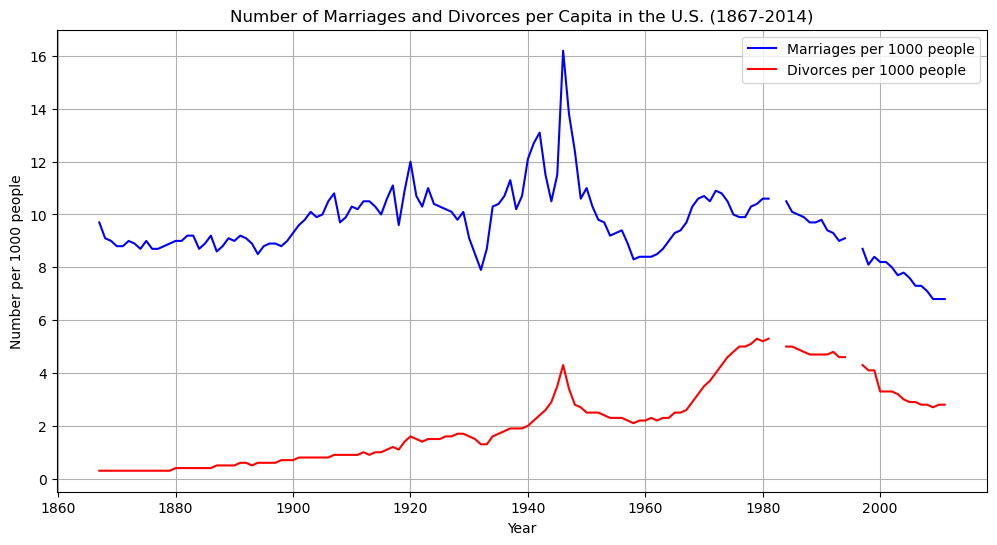

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = r"C:\Users\manyu\OneDrive\GEORGIAN\Data_Programming\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Plotting the data
plt.figure(figsize=(12, 6))

# Plotting the number of marriages per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000 people', color='blue')

# Plotting the number of divorces per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000 people', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

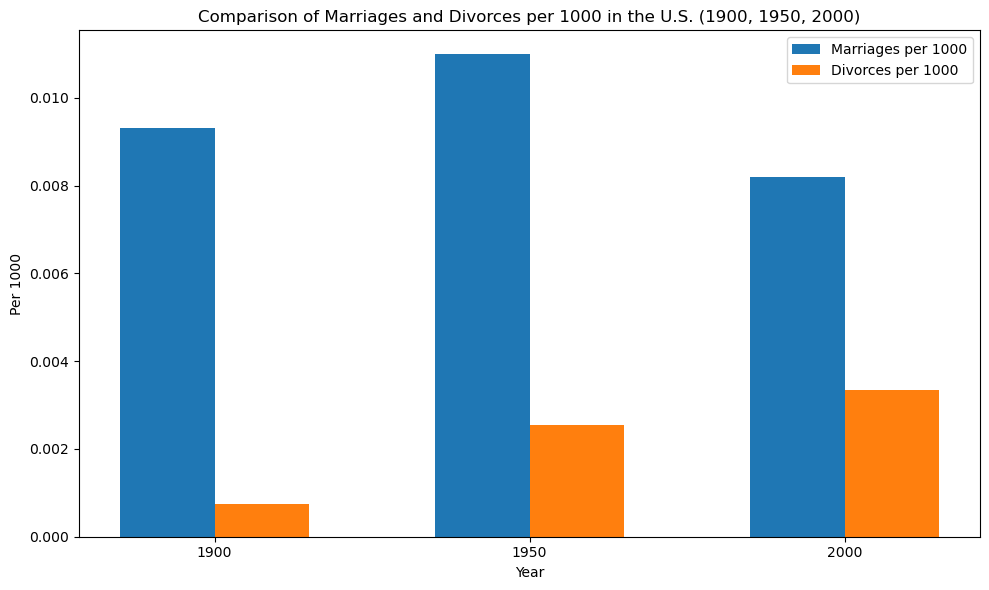

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = r"C:\Users\manyu\OneDrive\GEORGIAN\Data_Programming\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)].copy()

# Calculate per 1000 values using .loc indexer
filtered_data.loc[:, 'Marriages_per_1000'] = filtered_data['Marriages'] / filtered_data['Population']
filtered_data.loc[:, 'Divorces_per_1000'] = filtered_data['Divorces'] / filtered_data['Population']

# Create the vertical bar chart
plt.figure(figsize=(10, 6))

x = filtered_data['Year']
marriages_per_1000 = filtered_data['Marriages_per_1000']
divorces_per_1000 = filtered_data['Divorces_per_1000']

bar_width = 15
plt.bar(x - bar_width/2, marriages_per_1000, width=bar_width, label='Marriages per 1000')
plt.bar(x + bar_width/2, divorces_per_1000, width=bar_width, label='Divorces per 1000')

plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.title('Comparison of Marriages and Divorces per 1000 in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

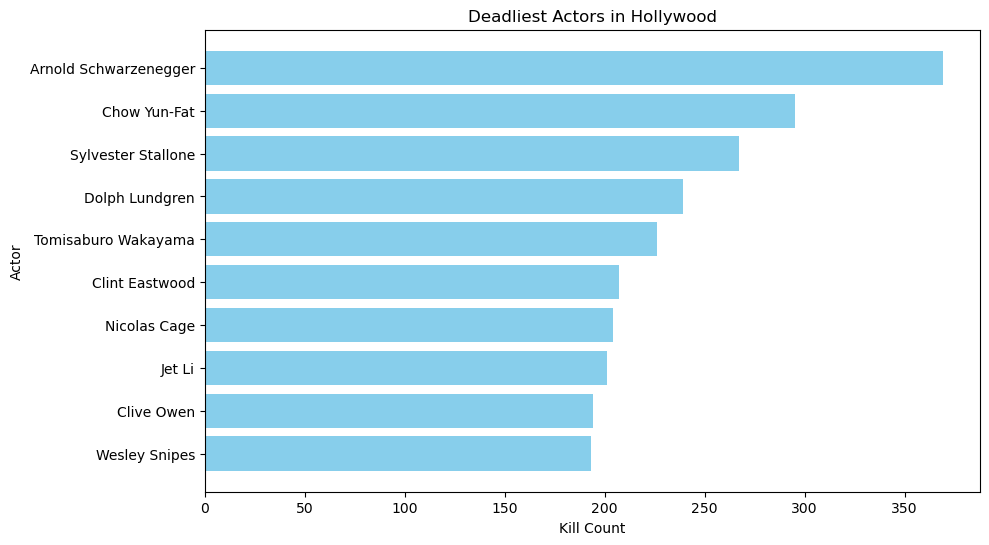

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\manyu\OneDrive\GEORGIAN\Data_Programming\actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort the data by kill count in descending order
sorted_data = data.sort_values(by='Count', ascending=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Creating horizontal bar chart
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')

# Adding labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display the plot
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

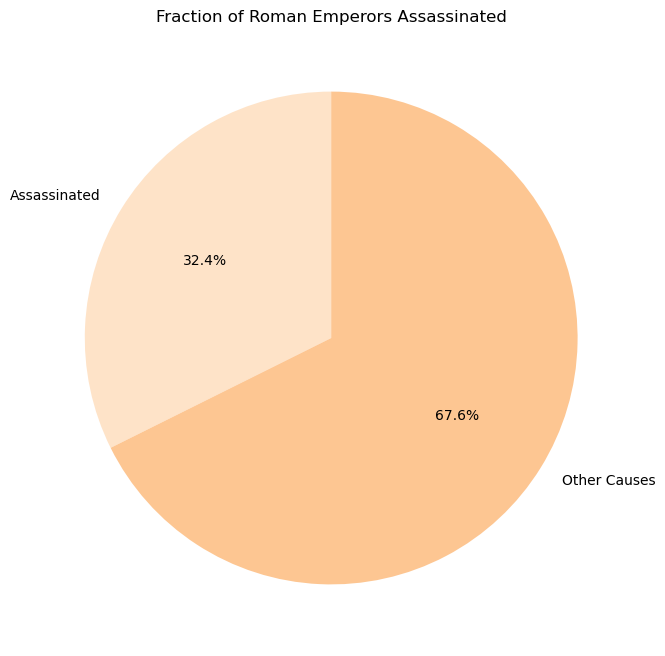

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\manyu\OneDrive\GEORGIAN\Data_Programming\roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Count the number of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the number of emperors who had other causes of death
other_count = data.shape[0] - assassinated_count

# Create data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_count]

# Plotting the data
plt.figure(figsize=(8, 8))

# Choose shades of blue
colors = sns.color_palette("Oranges")

# Creating pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Adding title
plt.title('Fraction of Roman Emperors Assassinated')

# Display the plot
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

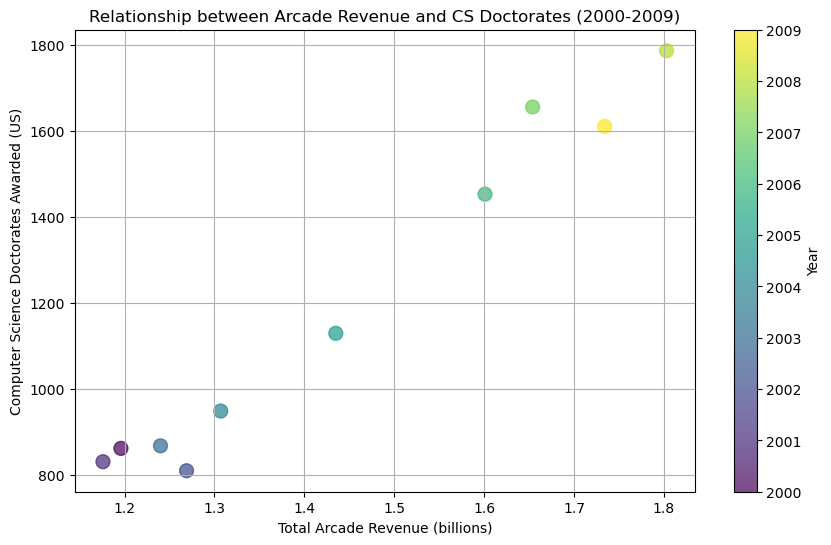

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\manyu\OneDrive\GEORGIAN\Data_Programming\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded dots for each year
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'],
    cmap='viridis',
    s=100,  # Marker size
    alpha=0.7,  # Transparency
)

# Adding colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Adding labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.grid(True)

# Display the plot